In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [97]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [99]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [100]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [102]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [103]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# ***With 2 Hidden Layers***

In [106]:
import warnings
warnings.filterwarnings("ignore")

import sqlite3
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_60 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_61 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.2305 - acc: 0.9307 - val_loss: 0.1122 - val_acc: 0.9654
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0875 - acc: 0.9735 - val_loss: 0.0992 - val_acc: 0.9679
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - lo

Test score: 0.0984150641524031
Test accuracy: 0.9808


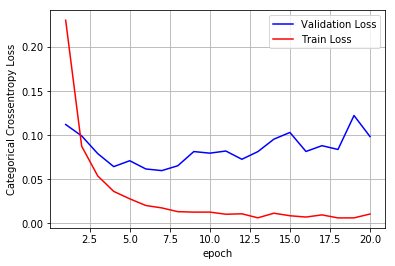

In [107]:
%matplotlib notebook

%matplotlib inline

score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

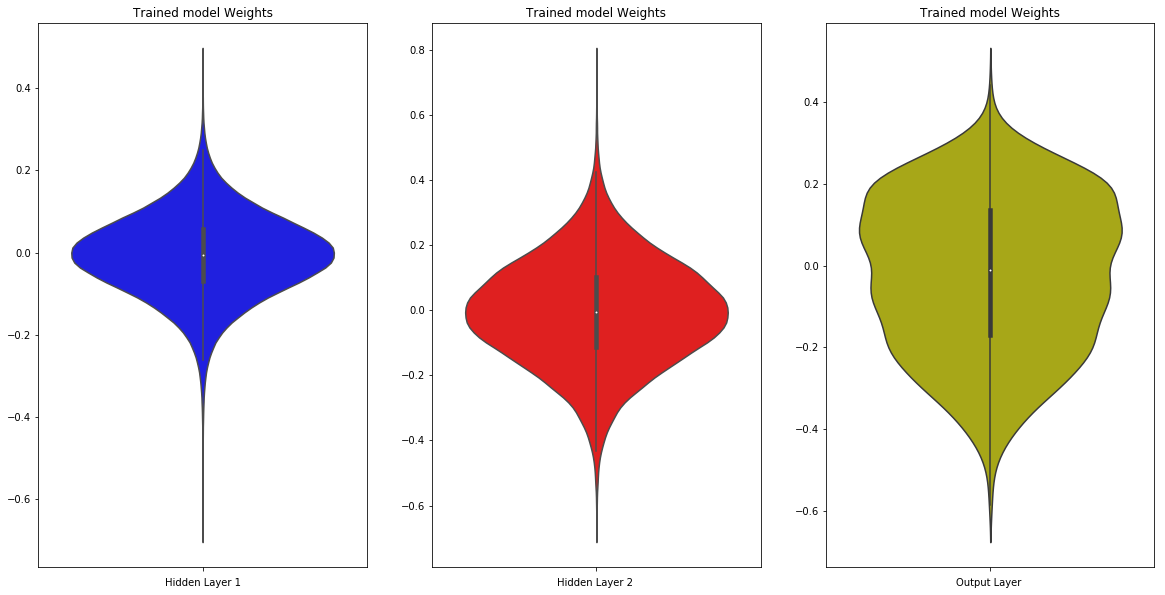

In [108]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**2 hidden layer with Batch Normalization**

In [109]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_33 (Batc (None, 512)               2048      
_________________________________________________________________
dense_63 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_34 (Batc (None, 128)               512       
_________________________________________________________________
dense_64 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [110]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.1874 - acc: 0.9436 - val_loss: 0.1063 - val_acc: 0.9683
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0717 - acc: 0.9795 - val_loss: 0.0827 - val_acc: 0.9746
Epoch 3/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0473 - acc: 0.9855 - val_loss: 0.0796 - val_acc: 0.9760
Epoch 4/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0335 - acc: 0.9899 - val_loss: 0.0749 - val_acc: 0.9778
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0254 - acc: 0.9923 - val_loss: 0.0704 - val_acc: 0.9790
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0209 - acc: 0.9941 - val_loss: 0.0677 - val_acc: 0.9799
Epoch 7/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0160 - acc: 0.9951 - val_loss: 0.0876 - va

Test score: 0.07641581873401783
Test accuracy: 0.9819


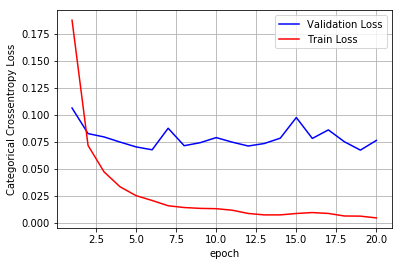

In [111]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

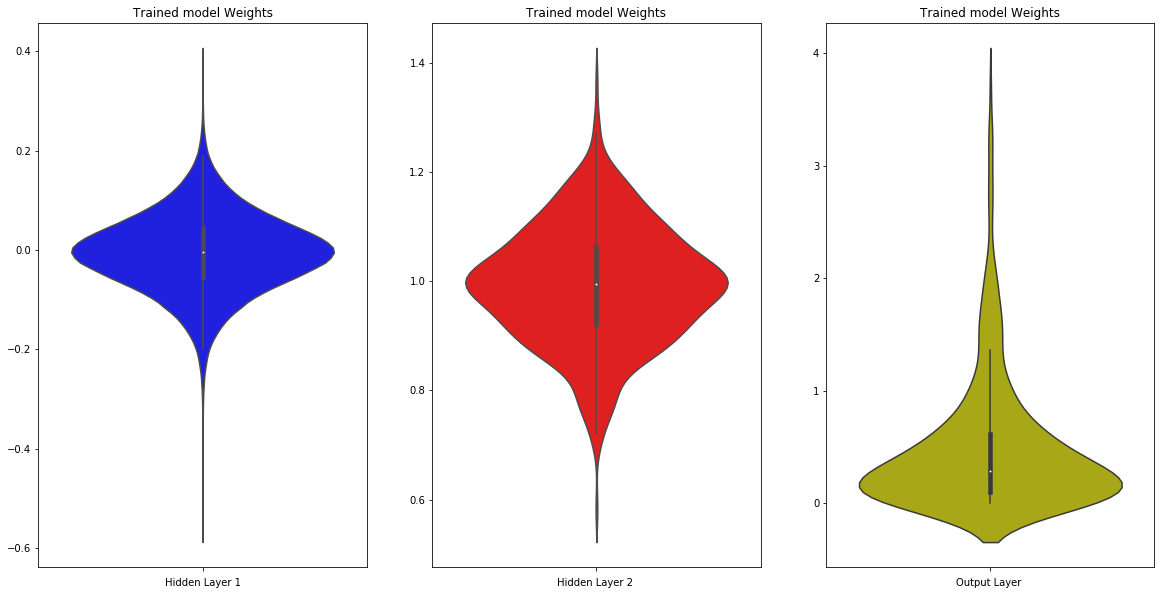

In [112]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**With 2 Hidden Layers Batch Normalization and Dropouts**

In [113]:
from keras.layers import Dropout
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_35 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_36 (Batc (None, 128)               512       
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 10)                1290      
Total para

In [114]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.4876 - acc: 0.8528 - val_loss: 0.1583 - val_acc: 0.9500
Epoch 2/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.2299 - acc: 0.9311 - val_loss: 0.1204 - val_acc: 0.9631
Epoch 3/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1795 - acc: 0.9455 - val_loss: 0.1000 - val_acc: 0.9703
Epoch 4/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1523 - acc: 0.9543 - val_loss: 0.0898 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1298 - acc: 0.9610 - val_loss: 0.0810 - val_acc: 0.9747
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1200 - acc: 0.9636 - val_loss: 0.0747 - val_acc: 0.9767
Epoch 7/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.1097 - acc: 0.9663 - val_loss: 0.0692 - v

Test score: 0.059726551363250474
Test accuracy: 0.9831


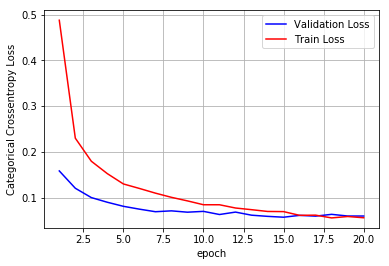

In [115]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

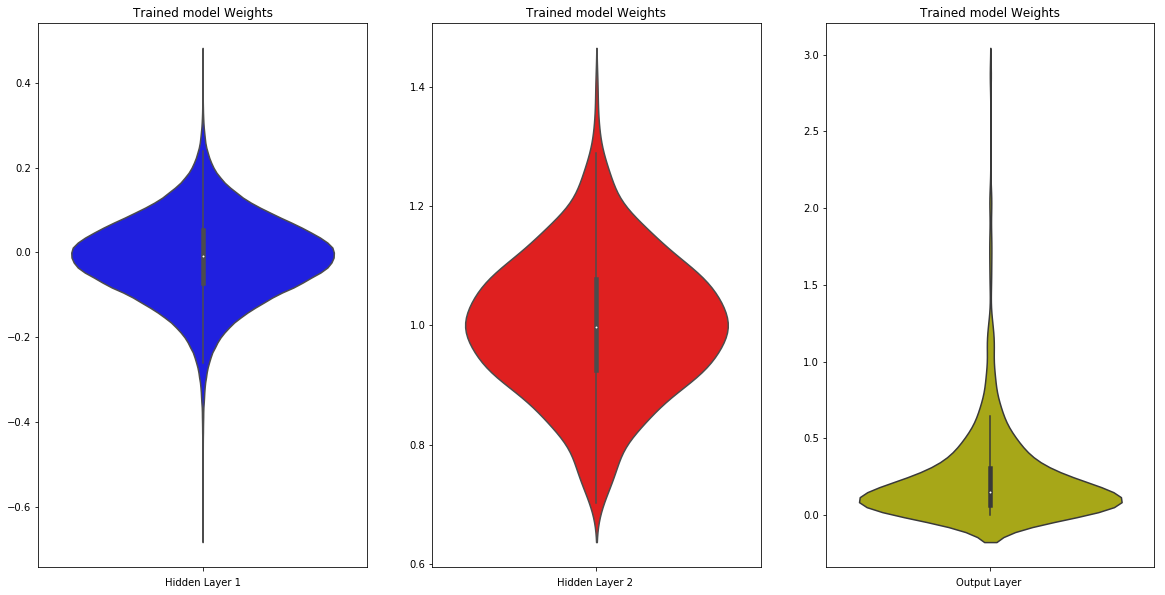

In [116]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**2 Hidden Layers with Batch Normalization and Dropouts with Sigmoid Activation and SGD optimization**

In [117]:
from keras.layers import Dropout
model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.15, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_37 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_38 (Batc (None, 128)               512       
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 10)                1290      
Total para

In [118]:
model_drop.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 170us/step - loss: 1.6077 - acc: 0.4927 - val_loss: 0.5450 - val_acc: 0.8296
Epoch 2/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.8969 - acc: 0.7046 - val_loss: 0.4476 - val_acc: 0.8658
Epoch 3/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.7654 - acc: 0.7517 - val_loss: 0.4093 - val_acc: 0.8775
Epoch 4/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.6927 - acc: 0.7776 - val_loss: 0.3869 - val_acc: 0.8840
Epoch 5/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.6437 - acc: 0.7962 - val_loss: 0.3708 - val_acc: 0.8894
Epoch 6/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.6109 - acc: 0.8066 - val_loss: 0.3582 - val_acc: 0.8951
Epoch 7/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.5880 - acc: 0.8131 - val_loss: 0.3485 - val_a

Test score: 0.2902466081291437
Test accuracy: 0.9151


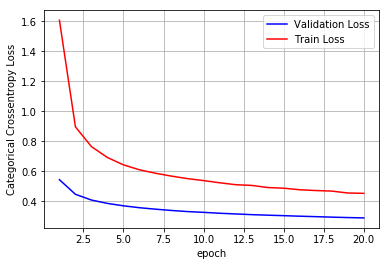

In [119]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

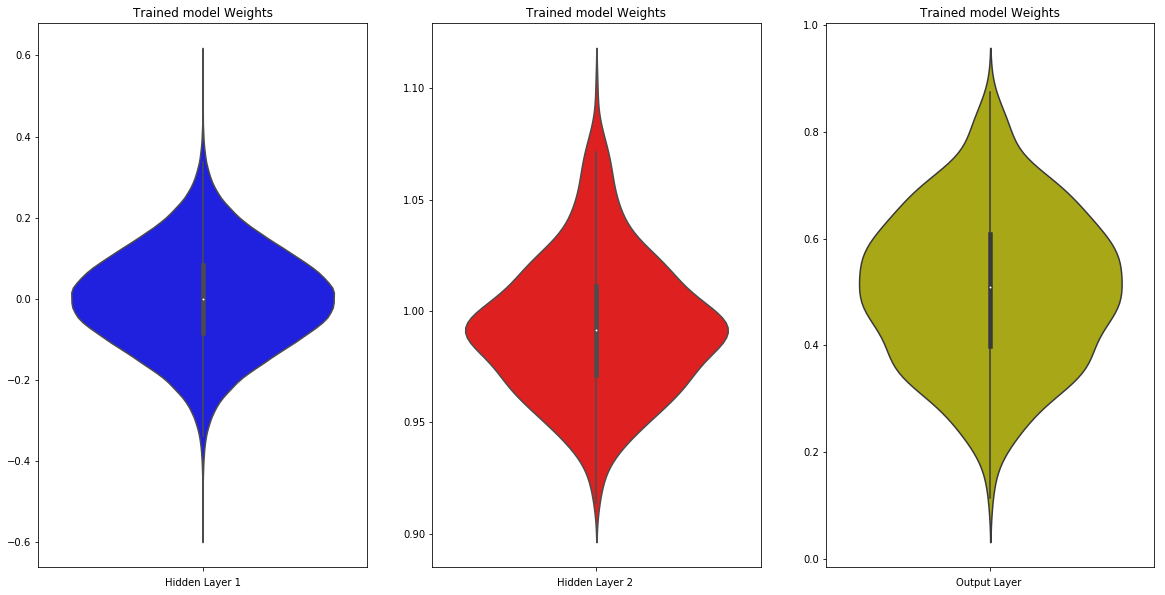

In [120]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**With 3 Hidden Layers**

In [121]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0,stddev=0.125, seed=None)))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_72 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_73 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_74 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [122]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.2132 - acc: 0.9356 - val_loss: 0.1233 - val_acc: 0.9625
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0833 - acc: 0.9743 - val_loss: 0.0746 - val_acc: 0.9763
Epoch 3/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0524 - acc: 0.9831 - val_loss: 0.0910 - val_acc: 0.9717
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0369 - acc: 0.9882 - val_loss: 0.0788 - val_acc: 0.9753
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0317 - acc: 0.9893 - val_loss: 0.0664 - val_acc: 0.9790
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0238 - acc: 0.9925 - val_loss: 0.0813 - val_acc: 0.9777
Epoch 7/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0224 - acc: 0.9929 - val_loss: 0.0731 - val_ac

Test score: 0.08900368867562401
Test accuracy: 0.9813


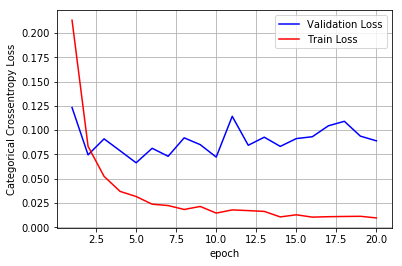

In [123]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))



vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

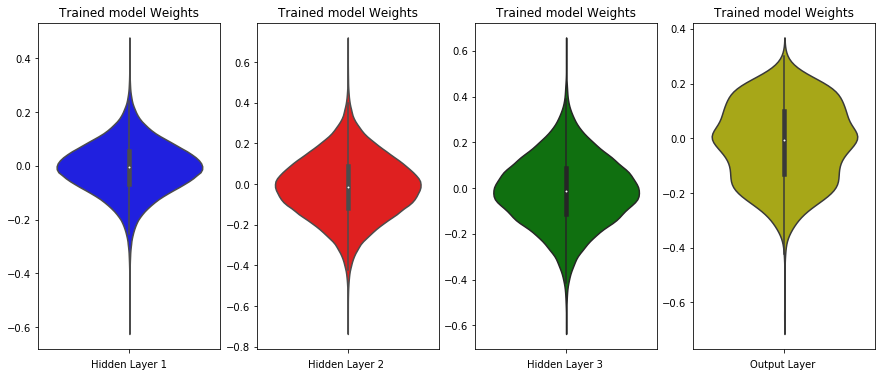

In [124]:
import  matplotlib.pyplot as plt
import seaborn as sns
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**With 3 Hidden Layers and Batch Normalization**

In [125]:
model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_39 (Batc (None, 512)               2048      
_________________________________________________________________
dense_76 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_40 (Batc (None, 256)               1024      
_________________________________________________________________
dense_77 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_41 (Batc (None, 128)               512       
_________________________________________________________________
dense_78 (Dense)             (None, 10)                1290      
Total para

In [126]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.1844 - acc: 0.9437 - val_loss: 0.1005 - val_acc: 0.9675
Epoch 2/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0723 - acc: 0.9783 - val_loss: 0.0822 - val_acc: 0.9749
Epoch 3/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0465 - acc: 0.9851 - val_loss: 0.0818 - val_acc: 0.9741
Epoch 4/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.0362 - acc: 0.9883 - val_loss: 0.0799 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0272 - acc: 0.9914 - val_loss: 0.0842 - val_acc: 0.9770
Epoch 6/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0265 - acc: 0.9909 - val_loss: 0.0788 - val_acc: 0.9760
Epoch 7/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0209 - acc: 0.9929 - val_loss: 0.0681 -

Test score: 0.07727775111382798
Test accuracy: 0.9813


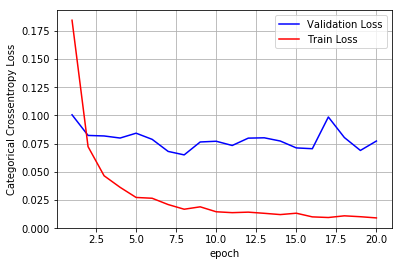

In [127]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

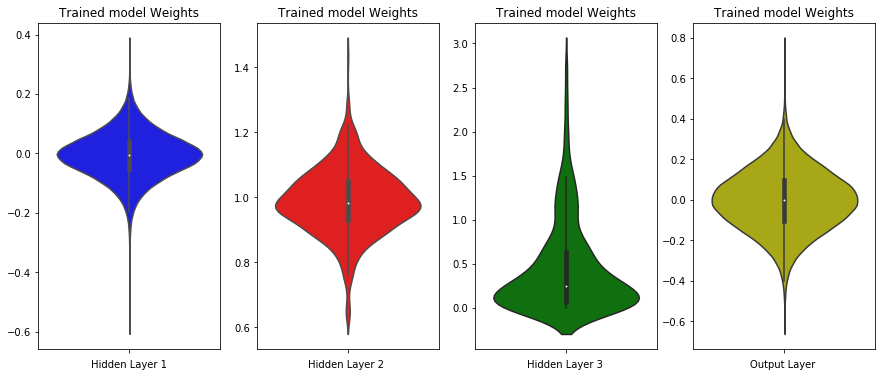

In [128]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**With 3 Hidden layers Batch Normalization and Dropout**

In [129]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_42 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_43 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 128)               32896     
__________

In [130]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.6614 - acc: 0.7966 - val_loss: 0.1914 - val_acc: 0.9398
Epoch 2/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2844 - acc: 0.9163 - val_loss: 0.1334 - val_acc: 0.9591
Epoch 3/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.2137 - acc: 0.9363 - val_loss: 0.1092 - val_acc: 0.9661
Epoch 4/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.1783 - acc: 0.9477 - val_loss: 0.1001 - val_acc: 0.9703
Epoch 5/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1567 - acc: 0.9538 - val_loss: 0.0933 - val_acc: 0.9735
Epoch 6/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1386 - acc: 0.9587 - val_loss: 0.0835 - val_acc: 0.9761
Epoch 7/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.1255 - acc: 0.9627 - val_loss: 0.0773 -

Test score: 0.06132577421341557
Test accuracy: 0.9837


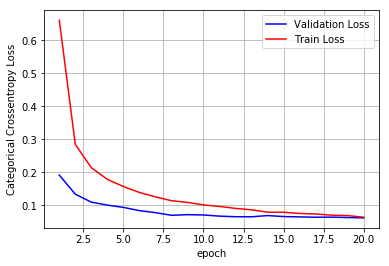

In [131]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

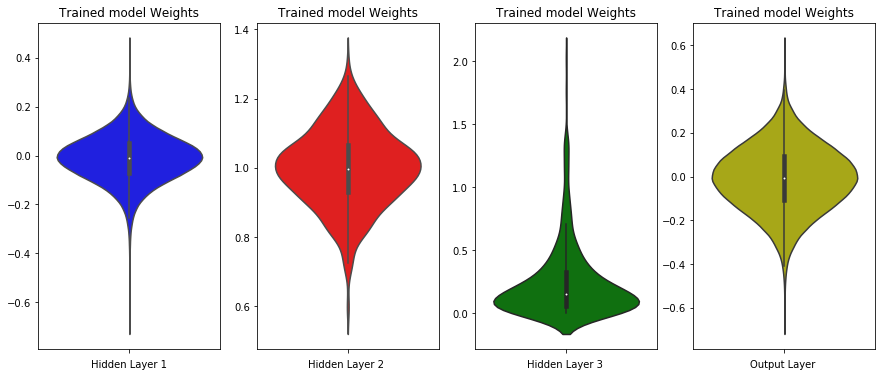

In [132]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**3 Hidden Layers with Batach Normalization and Dropout with Sigmoid Activation and SGD Optimizer**

In [133]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.15, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_45 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 128)               32896     
__________

In [134]:
model_drop.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 220us/step - loss: 1.6344 - acc: 0.4828 - val_loss: 0.5139 - val_acc: 0.8433
Epoch 2/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.9708 - acc: 0.6780 - val_loss: 0.4351 - val_acc: 0.8677
Epoch 3/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.8265 - acc: 0.7284 - val_loss: 0.4038 - val_acc: 0.8805
Epoch 4/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.7547 - acc: 0.7555 - val_loss: 0.3840 - val_acc: 0.8864
Epoch 5/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.7080 - acc: 0.7708 - val_loss: 0.3686 - val_acc: 0.8923
Epoch 6/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.6665 - acc: 0.7874 - val_loss: 0.3586 - val_acc: 0.8948
Epoch 7/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.6415 - acc: 0.7976 - val_loss: 0.3485 -

Test score: 0.29052437879443166
Test accuracy: 0.9147


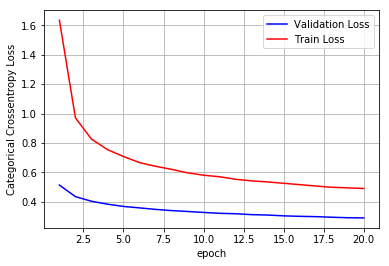

In [135]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

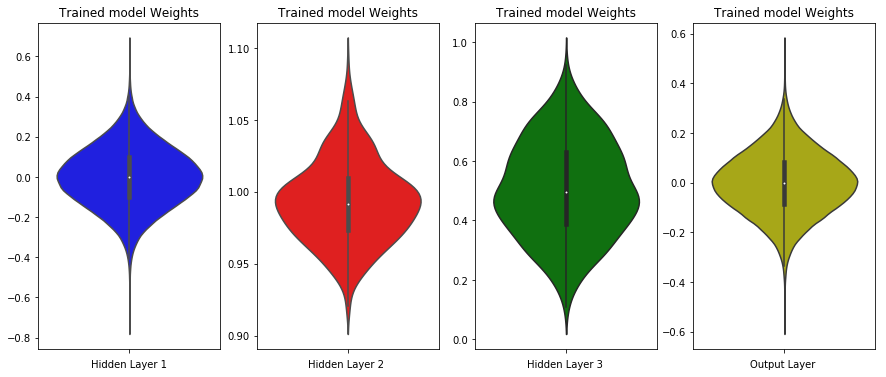

In [136]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**With 5 Hidden Layers**

In [137]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0,stddev=0.125, seed=None)))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0,stddev=0.125, seed=None)))
model_relu.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0,stddev=0.125, seed=None)))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_88 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_89 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_90 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_91 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_92 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_________________________________________________________________


In [138]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.2555 - acc: 0.9240 - val_loss: 0.1427 - val_acc: 0.9577
Epoch 2/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0941 - acc: 0.9711 - val_loss: 0.1080 - val_acc: 0.9688
Epoch 3/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0626 - acc: 0.9804 - val_loss: 0.0732 - val_acc: 0.9772
Epoch 4/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0479 - acc: 0.9849 - val_loss: 0.0870 - val_acc: 0.9749
Epoch 5/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0352 - acc: 0.9890 - val_loss: 0.0806 - val_acc: 0.9771
Epoch 6/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0332 - acc: 0.9891 - val_loss: 0.0821 - val_acc: 0.9776
Epoch 7/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0272 - acc: 0.9915 - val_loss: 0.0809 - val_a

Test score: 0.0918737452906118
Test accuracy: 0.979


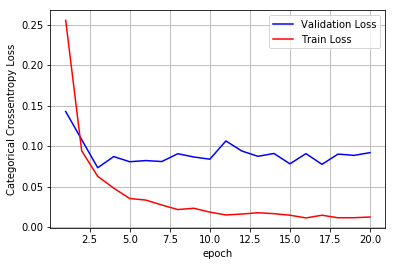

In [139]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

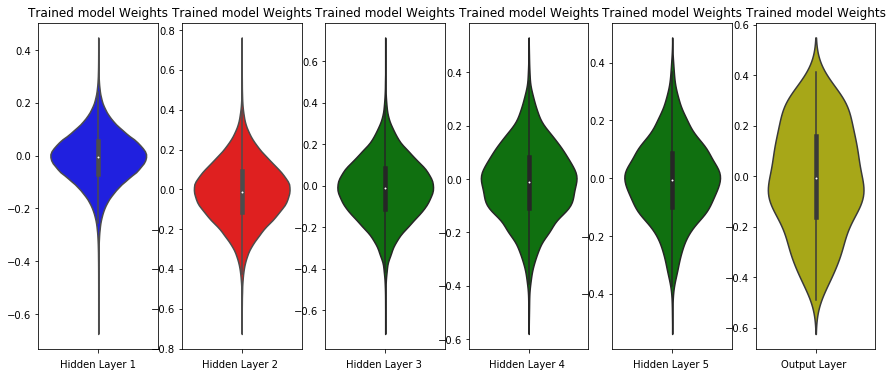

In [140]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='g')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='g')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**With 5 Hidden Layers and Batch Normalization**

In [141]:
model_batch = Sequential()
model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0,stddev=0.125, seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0,stddev=0.125, seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0,stddev=0.125, seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(output_dim, activation='softmax'))

model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_48 (Batc (None, 512)               2048      
_________________________________________________________________
dense_94 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_49 (Batc (None, 256)               1024      
_________________________________________________________________
dense_95 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_50 (Batc (None, 128)               512       
_________________________________________________________________
dense_96 (Dense)             (None, 64)                8256      
__________

In [142]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.2752 - acc: 0.9229 - val_loss: 0.1155 - val_acc: 0.9654
Epoch 2/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0892 - acc: 0.9738 - val_loss: 0.0946 - val_acc: 0.9721
Epoch 3/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0592 - acc: 0.9820 - val_loss: 0.0886 - val_acc: 0.9738
Epoch 4/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0490 - acc: 0.9844 - val_loss: 0.0753 - val_acc: 0.9773
Epoch 5/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0371 - acc: 0.9881 - val_loss: 0.0816 - val_acc: 0.9772
Epoch 6/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0324 - acc: 0.9898 - val_loss: 0.0782 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.0314 - acc: 0.9895 - val_loss: 0.

Test score: 0.08866177866868966
Test accuracy: 0.98


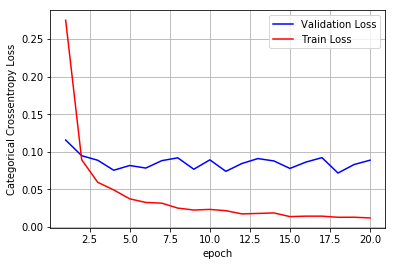

In [143]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

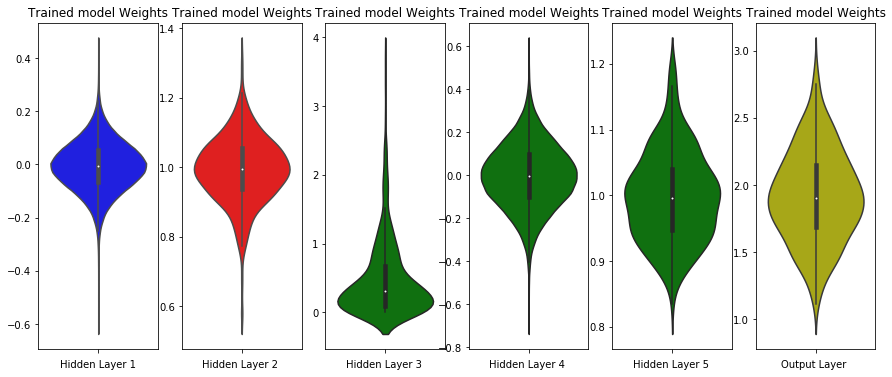

In [144]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='g')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='g')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## **With 5 Hidden Layers and Batch Normalization and Dropout**

In [145]:
model_drop = Sequential()

model_drop.add(Dense(784, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0505, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.17677, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(16, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.35355, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 784)               615440    
_________________________________________________________________
batch_normalization_53 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_33 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_54 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_34 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 128)               65664     
__________

In [146]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 310us/step - loss: 1.6184 - acc: 0.4507 - val_loss: 0.4698 - val_acc: 0.9014
Epoch 2/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.8066 - acc: 0.7550 - val_loss: 0.2098 - val_acc: 0.9453
Epoch 3/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.5491 - acc: 0.8453 - val_loss: 0.1589 - val_acc: 0.9586
Epoch 4/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.4344 - acc: 0.8813 - val_loss: 0.1351 - val_acc: 0.9646
Epoch 5/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.3718 - acc: 0.9010 - val_loss: 0.1210 - val_acc: 0.9683
Epoch 6/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.3284 - acc: 0.9145 - val_loss: 0.1237 - val_acc: 0.9695
Epoch 7/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.3116 - acc: 0.9211 - val_loss: 0.

Test score: 0.08505998221136397
Test accuracy: 0.9834


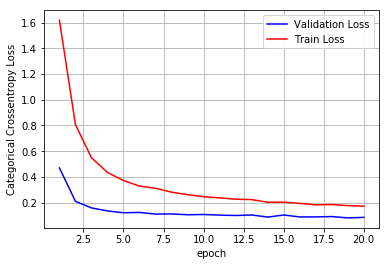

In [147]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

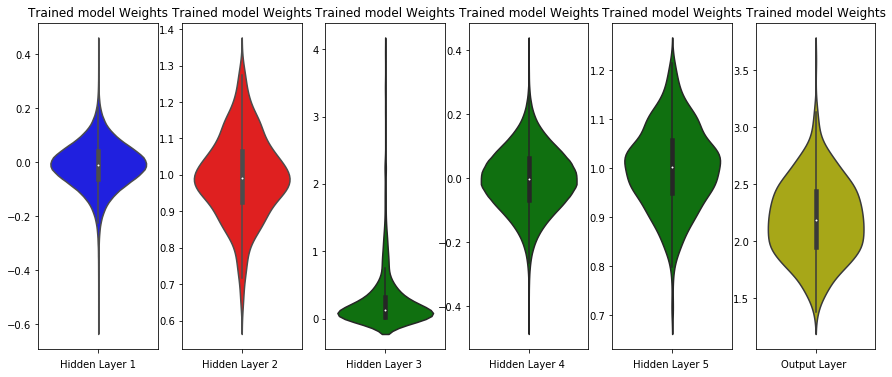

In [148]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='g')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='g')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**5 Hidden Layers with Batch Optimization and Droputs with Sigmoid Activation and SGD Optimization**

In [149]:
model_drop = Sequential()

model_drop.add(Dense(784, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0505, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(512, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.17677, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(16, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.35355, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 784)               615440    
_________________________________________________________________
batch_normalization_58 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_38 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_59 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_39 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 128)               65664     
__________

In [150]:
model_drop.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 262us/step - loss: 2.3229 - acc: 0.2282 - val_loss: 1.2942 - val_acc: 0.6183
Epoch 2/20
60000/60000 [==============================] - 8s 133us/step - loss: 1.8329 - acc: 0.3525 - val_loss: 1.1235 - val_acc: 0.6762
Epoch 3/20
60000/60000 [==============================] - 8s 137us/step - loss: 1.6443 - acc: 0.4205 - val_loss: 0.9889 - val_acc: 0.7234
Epoch 4/20
60000/60000 [==============================] - 9s 149us/step - loss: 1.5130 - acc: 0.4683 - val_loss: 0.8847 - val_acc: 0.7624
Epoch 5/20
60000/60000 [==============================] - 9s 150us/step - loss: 1.4148 - acc: 0.5050 - val_loss: 0.8134 - val_acc: 0.7799
Epoch 6/20
60000/60000 [==============================] - 9s 151us/step - loss: 1.3448 - acc: 0.5309 - val_loss: 0.7622 - val_acc: 0.7901
Epoch 7/20
60000/60000 [==============================] - 9s 149us/step - loss: 1.2858 - acc: 0.5552 - val_loss: 0.7190 -

Test score: 0.49137789916992186
Test accuracy: 0.8619


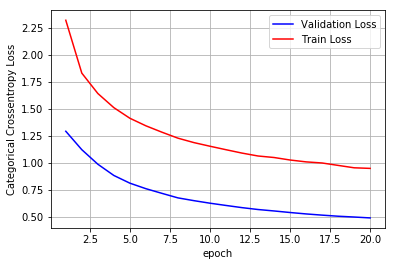

In [151]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

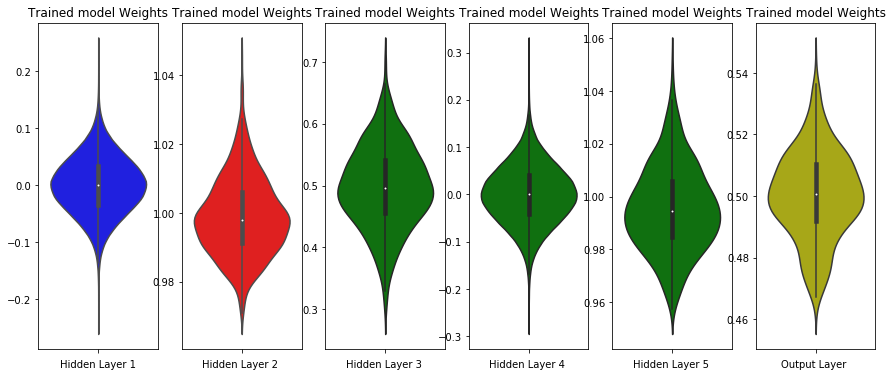

In [152]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='g')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='g')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [153]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Activation","Optimizers","Number of Hidden Layers","Batch Normalization","Dropout","Train Error","Test Error","Test Accuracy" ]
x.add_row(["ReLU","Adam","2","No","No","0.0065","0.0967","98.05"])
x.add_row(["ReLU","Adam","2","Yes","No","0.0062","0.0839","98.14"])
x.add_row(["ReLU","Adam","2","Yes","Yes","0.0555","0.0539","98.35"])
x.add_row(["Sigmoid","SGD","2","Yes","Yes","0.4574","0.2845","91.6"])
x.add_row(["ReLU", "Adam", "3", "No", "No", "0.006","0.0946","99.8"])
x.add_row(["ReLU","Adam","3","Yes","No","0.0107","0.0831","98.16"])
x.add_row(["ReLU","Adam","3","Yes","Yes","0.0652","0.0631","98.27"])
x.add_row(["Sigmoid", "SGD", "3", "Yes", "Yes", "0.49","0.2952","91.61"])
x.add_row(["ReLU","Adam","5","No","No","0.0109","0.1119","97.82"])
x.add_row(["ReLU","Adam","5","Yes","No","0.0104","0.0845","98.04"])
x.add_row(["ReLU","Adam","5","Yes","Yes","0.1797","0.0832","98.2"])
x.add_row(["Sigmoid","SGD","5","Yes","Yes","0.9528","0.4815","86.98"])
x.border=True
print(x)


+------------+------------+-------------------------+---------------------+---------+-------------+------------+---------------+
| Activation | Optimizers | Number of Hidden Layers | Batch Normalization | Dropout | Train Error | Test Error | Test Accuracy |
+------------+------------+-------------------------+---------------------+---------+-------------+------------+---------------+
|    ReLU    |    Adam    |            2            |          No         |    No   |    0.0065   |   0.0967   |     98.05     |
|    ReLU    |    Adam    |            2            |         Yes         |    No   |    0.0062   |   0.0839   |     98.14     |
|    ReLU    |    Adam    |            2            |         Yes         |   Yes   |    0.0555   |   0.0539   |     98.35     |
|  Sigmoid   |    SGD     |            2            |         Yes         |   Yes   |    0.4574   |   0.2845   |      91.6     |
|    ReLU    |    Adam    |            3            |          No         |    No   |    0.006   

**Conclusion:**

1. The various MLP architectures are performed on MNIST Data Set which is readily available in Keras.
2. We have tried MLP architectures with 2 hidden Layers, 3 Hidden Layers and 5 Hidden Layers
3. We have Used both SIgmoid and ReLU activation 
4. We have also used Adam and SGD optimizers for the assignment
5. We have tried with various Weights
6. From the observation above we see that ReLU with Adam Optimizer and 3 Hidden Layer with no Batch Normalization and Dropouts is giving us the Maximum Test Accuracy of 99.8%
7. Overall the models with No Batch Normalization or Dropouts is providing better accuracy than Models with Batch Normalization or Dropouts
8. ReLU activation is giving us better Test Accuracy than Sigmoid Activation as observed above.
9. Overall as the Data set is simple we may not be able to understand the significance of Batch Normalization and Dropouts
